In [1]:
# Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица 
#с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

# Задачи
# 1) Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее 
#количество кликов на объявления за весь период (округлите до целых).


# 2) Нарисуйте график распределения показов на объявление за весь период.


# 3) Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 
# 6 апреля 2019 года (ответ округлите до целых)?


# 4) Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график 
#значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается 
#наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее 
#равно NaN, не учитываем. 


# 5) *Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день,
# в который была замечена самая большая по модулю аномалия. 


# 6) Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного 
# клиента и первым запуском рекламного объявления этим клиентом.


# 7) Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате 
# pd.Timedelta(365, unit='d'))


# 8) Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
#Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования 
#(от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]


# # А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [53]:
#импортируем модули
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [54]:
#делаем стили для графиков
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [55]:
#считываем данные 
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [56]:
ads_client = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [57]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [58]:
#1) Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее 
#количество кликов на объявления за весь период (округлите до целых).

In [59]:
#смотрим среднее значение по кликам и просмотрам, делая сводную таблицу
ads_data.groupby(['ad_id','event'], as_index=False)\
    .agg({'date': 'count'}) \
    .rename(columns={'date':'number'}) \
    .pivot(index='ad_id', columns='event', values='number')  \
    .reset_index() \
    .fillna(0) \
    .mean().round()

event
ad_id    57971.0
click      113.0
view       923.0
dtype: float64

In [60]:
ads_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [61]:
#2) Нарисуйте график распределения показов на объявление за весь период.
#строим нам нужный датафрэйм
view_data = ads_data.query('event == "view"') \
    .groupby(['ad_id','event'], as_index=False)\
    .agg({'date': 'count'}) \
    .rename(columns={'date':'view_count'})

In [62]:
#логарифмируем значения показов
view_data.view_count = np.log(view_data.view_count)

In [63]:
view_data.head()

,ad_id,event,view_count
0,2,view,4.615121
1,3,view,5.214936
2,1902,view,3.713572
3,2064,view,3.555348
4,2132,view,4.060443


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


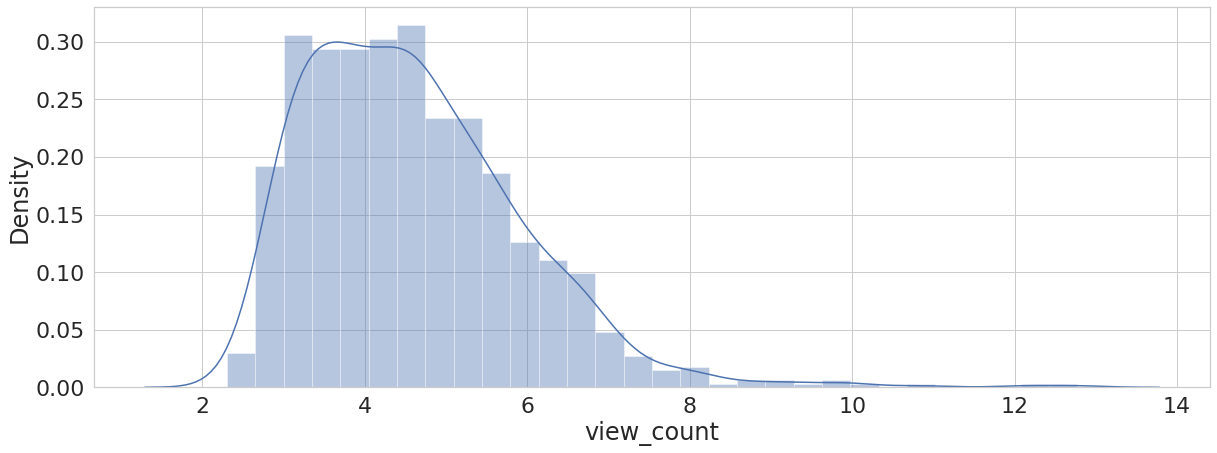

In [64]:
#строим гистограмму по view_count
sns.distplot(view_data.view_count)

In [65]:
# 3) Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 
# 6 апреля 2019 года (ответ округлите до целых)?

In [66]:
#сначала группируем значения по обьявлению и дате и агреггируем по числу показов. Далее для обьявления получилось
#по несколько дней. И уже по каждому дню мы берем и считываем среднее значение показов обьявлений 
ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'event': 'count'}) \
    .groupby('date') \
    .agg({'event': 'mean'})\
    .rolling(2).mean().round()

,event
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


In [67]:
# 4) Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график 
#значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается 
#наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее 
#равно NaN, не учитываем. 

In [68]:
#дата сет с арифмитеским средним
view_mean = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'event': 'count'}) \
    .groupby('date') \
    .agg({'event': 'mean'})\
    

In [69]:
#дата сет со скользящим средним
view_mean_rolling = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'event': 'count'}) \
    .groupby('date') \
    .agg({'event': 'mean'})\
    .rolling(2).mean().round()

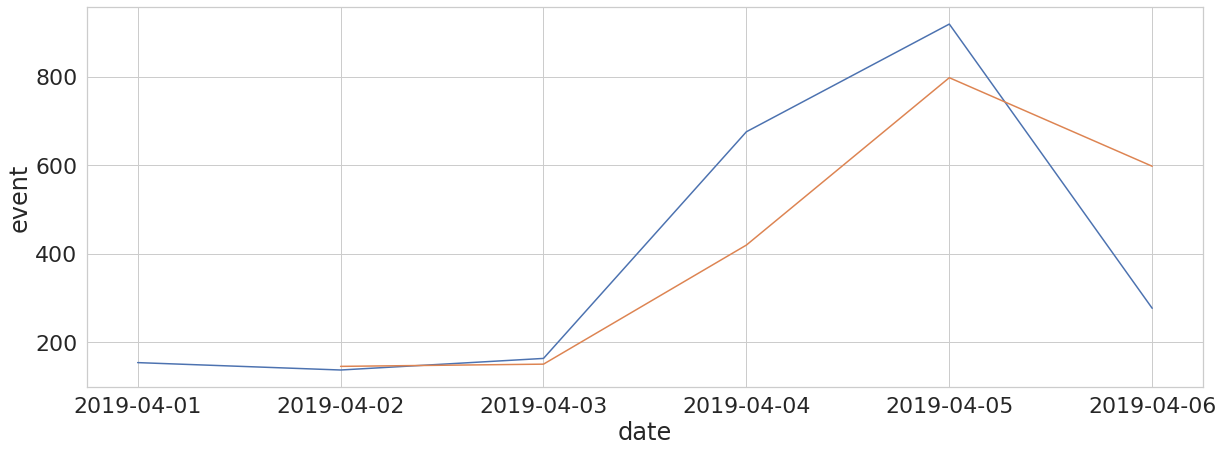

In [70]:
# 5) *Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день,
# в который была замечена самая большая по модулю аномалия. 
#строим график
sns.lineplot(data=view_mean, x="date", y="event")
sns.lineplot(data=view_mean_rolling, x="date", y="event")

In [71]:
# 6) Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного 
# клиента и первым запуском рекламного объявления этим клиентом.

In [72]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [73]:
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [172]:
#обьединяем два датафрейма с помощью merge по общему столбцу client_union_id. включая все значения в how outer
full_data = ads_data.merge(ads_client, on='client_union_id', how = 'outer')
full_data.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04


In [173]:
#переводим даты в формат datetime
full_data.date_y = pd.to_datetime(full_data.date_y)
full_data.date_x = pd.to_datetime(full_data.date_x)
full_data.create_date = pd.to_datetime(full_data.create_date)

In [174]:
#создаемм столбец difference, считаем разницу времени
full_data['difference'] = full_data.date_x - full_data.create_date

In [175]:
#берем минимальное значение и находим уже среднее. Ответ 124
full_data.groupby('client_union_id', as_index=False)\
    .agg({'difference':'min'}).mean()

client_union_id                        61039.5
difference         124 days 09:04:43.532219570
dtype: object

In [78]:
# 7) Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате 
# pd.Timedelta(365, unit='d'))




In [184]:
#создаем новый дата фрейм без дубликатов по столбцу client_union_id
new_df = full_data.drop_duplicates(subset=['client_union_id'])

0

In [190]:
#смотрим сколько не пропущенных значений получилось, когда мы берем только уникальных клиентов
sum(new_df.difference.isna() == False)

838

In [151]:
#берем кол-во уникаьлных пользователей
len(full_data.client_union_id.unique())

122078

In [196]:
#находим конверсию и округляем до сотых
ctr = round(838 / 122078 * 100, 2)


0.69

In [ ]:
# 8) Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
#Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования 
#(от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [205]:
#создаем labels чтобы было удобно, потом bins ограничения по дням и уже используем pd.cut
labels=['0-30 days', '30-90 days', '90-180 days', '180-365 days']
bins = pd.to_timedelta([pd.to_timedelta('0d'), pd.to_timedelta('30d'), pd.to_timedelta('90d'), pd.to_timedelta('180d'), pd.to_timedelta('365d')])
#разделение дней по delays
new_df['промежутки'] = pd.cut(new_df.difference, bins = bins, labels = labels, include_lowest = False)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [204]:
#смотрим по заданию уникальные значения клиентов 0-30 дней
(new_df['промежутки'] == '0-30 days').sum()

11

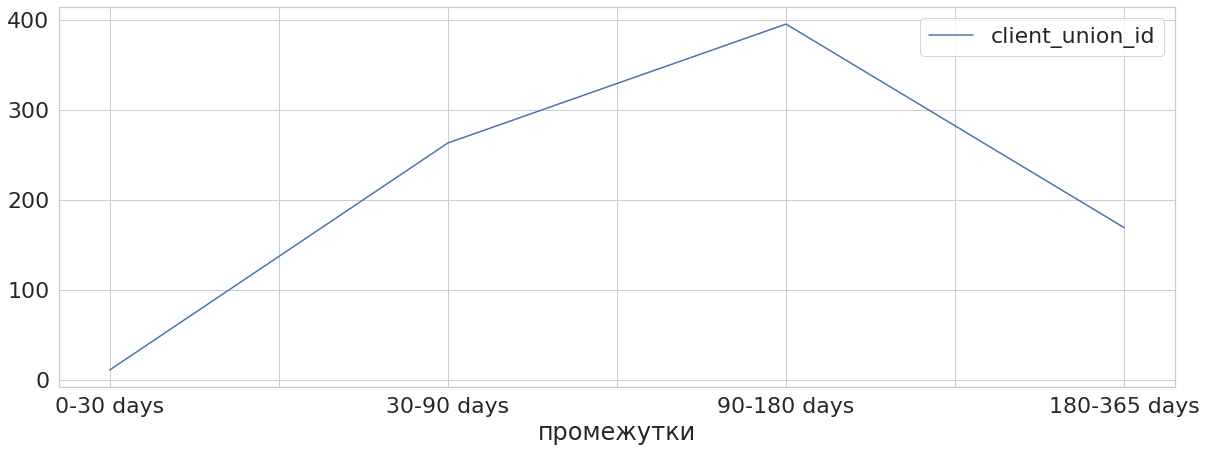

In [214]:
# А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.
new_df.groupby('промежутки', as_index = False) \
    .agg({'client_union_id':'count'}).plot(x='промежутки', y='client_union_id')